# Automated Recognition Of Over Flowing Garbage Bins

A big challenge in the enclosed campus is solid waste management. The garbage collecting authority in traditional waste management system doesn’t know about the level of garbage in dustbin or the garbage segregated in a place, if the dust bins gets full by garbage then it gets overflowed as well as spelled out from the dustbin leading to unhygienic condition in the campus. People throw garbage on that dustbin which is already overflowed. Sometimes due to unclean garbage bins bad smell arises also toxic and unhygienic gases are produced which is way to support to the air pollution and to some harmful diseases which are easily spreadable. 


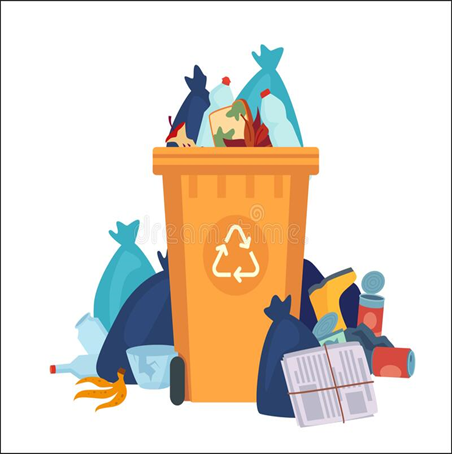


## Dataset

>Garbage dataset

	* Kaggle Link: Dataset
	* Shape: 3412 Images
		* Clean: 1806
		* Trash: 1606
        
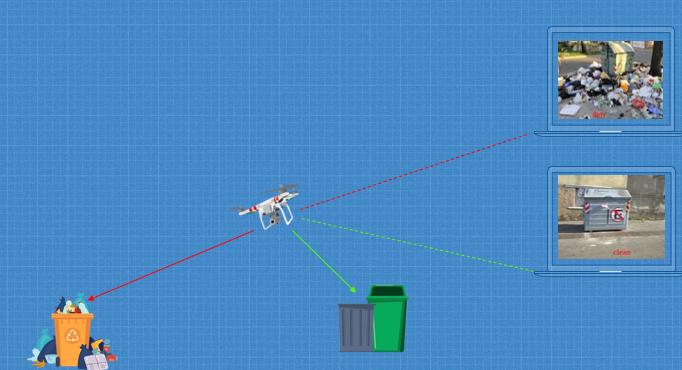


## Proposed Flow

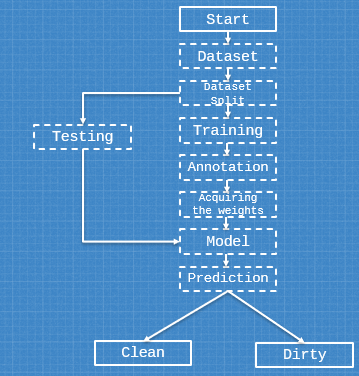





### Installing all the required packages 
> PyTorch : <a href="https://pytorch.org/">Download</a>

> Gradio: <a href="https://github.com/gradio-app/gradio">Documentation</a>

> YOLOv5: <a href="https://github.com/ultralytics/yolov5">Download/Documentation</a>

> labelImg: <a href="https://github.com/heartexlabs/labelImg">Download</a>


#### Reason for using the above packages
> YOLOv5 is a state of art object detection package which runs on Pytorch. I used labelImg to annote the images because the image is not annoted. Gradio is used build a web GUI

In [ ]:
# Installing the pytorch package
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

In [ ]:
# Gardio is used to build a simple GUI
!pip install gradio

In [ ]:
#clonning YOLOV5 model from github
!git clone https://github.com/ultralytics/yolov5

In [ ]:
# Installing all the requirement for the YOLOv5
!cd yolov5 & pip install -r requirements.txt

In [ ]:
# Annotation package
!git clone https://github.com/tzutalin/labelImg

In [ ]:
# Install these packages based on the error faced
!pip install anyio>=3.4.0
!pip install starlette
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
# All required libraries
from PIL import Image
from matplotlib import cm
import torch
import matplotlib
from matplotlib import pyplot as plt
matplotlib.use('TkAgg')
%matplotlib inline 
import numpy as np
import cv2
import os
import gradio as gr

In [ ]:
# This might take long but You can termininate after some time(ctr + c)
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/best.pt', force_reload=True)

In [ ]:

def imageclass(img):
    results = model(img)
    results.print()
    x=np.squeeze(results.render())
    return x
imag = gr.inputs.Image()
lab = gr.outputs.Image()
gr.Interface(fn=imageclass,inputs=imag,outputs=lab).launch()

In [ ]:
gr.Image(source='webcam')
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## Note

* Check out the documentation attached as it will give the complete detail about the project
* .yaml folder is attached seperatly
* annoted images are also added
* try deepsort for better image tracking